In [532]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#TODO: fare una verifica dei parametri come iterazione ecc per ogni oggetto

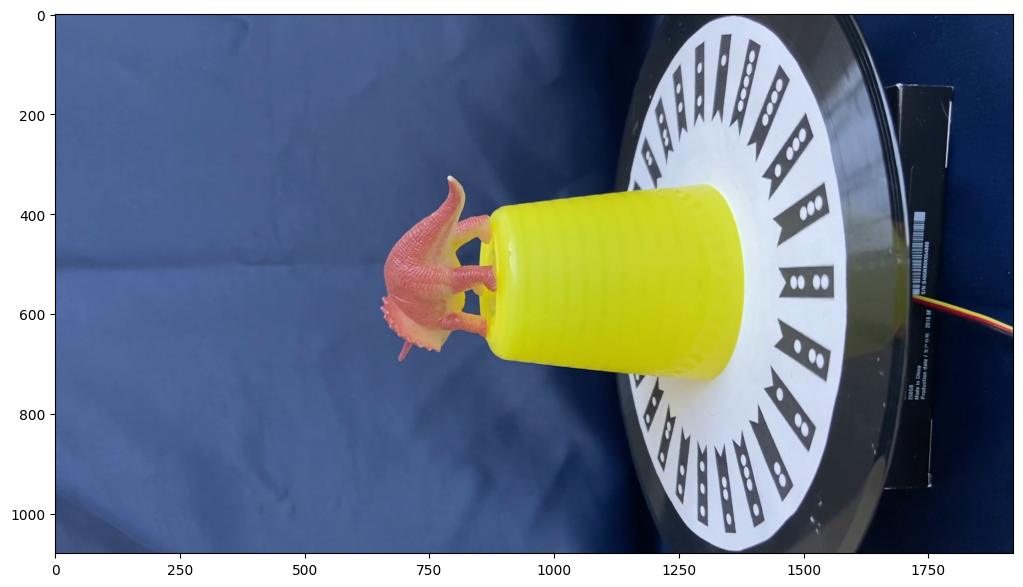

In [533]:
image = cv.imread("./assignment1_test_dataset/obj02/000002.png").astype(np.uint8)

rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,7))
plt.imshow(rgb_img)

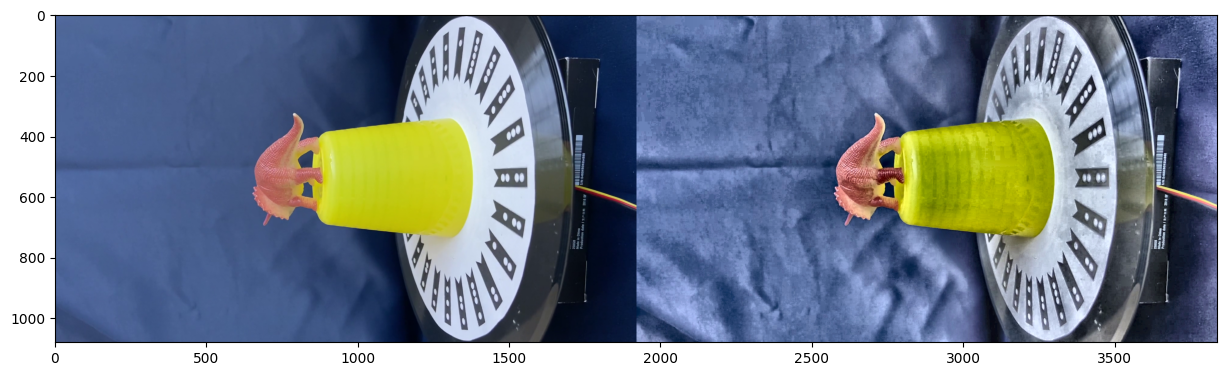

In [534]:
lab = cv.cvtColor(rgb_img, cv.COLOR_RGB2LAB)
l_channel, a, b = cv.split(lab)

# Applying CLAHE to L-channel
#3.0, (5,5)
l_clahe = cv.createCLAHE(clipLimit=8, tileGridSize=(13,13))
l_channel = l_clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((l_channel,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2RGB)


# Stacking the original image with the enhanced image
result = np.hstack((rgb_img, enhanced_img))
plt.figure(figsize=(15,7))
plt.imshow(result)

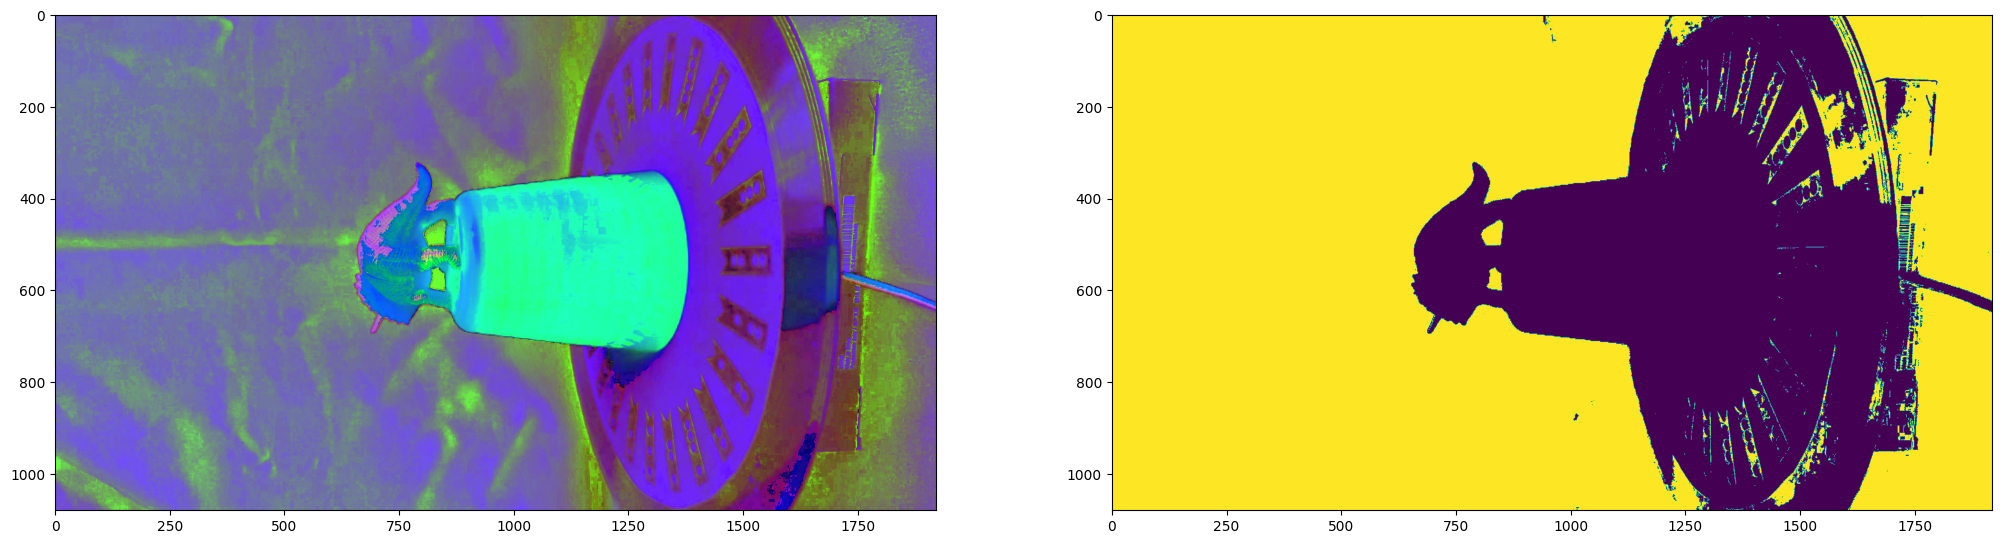

In [535]:
new_hvs = cv.cvtColor(enhanced_img, cv.COLOR_RGB2HSV)

#100,70,40   130,255,255
# lower blu - upper blu
color_mask = cv.inRange(new_hvs, np.array([105,70,0]), np.array([165,255,255]))


plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(new_hvs)
plt.subplot(2,2,2)
plt.imshow(color_mask)

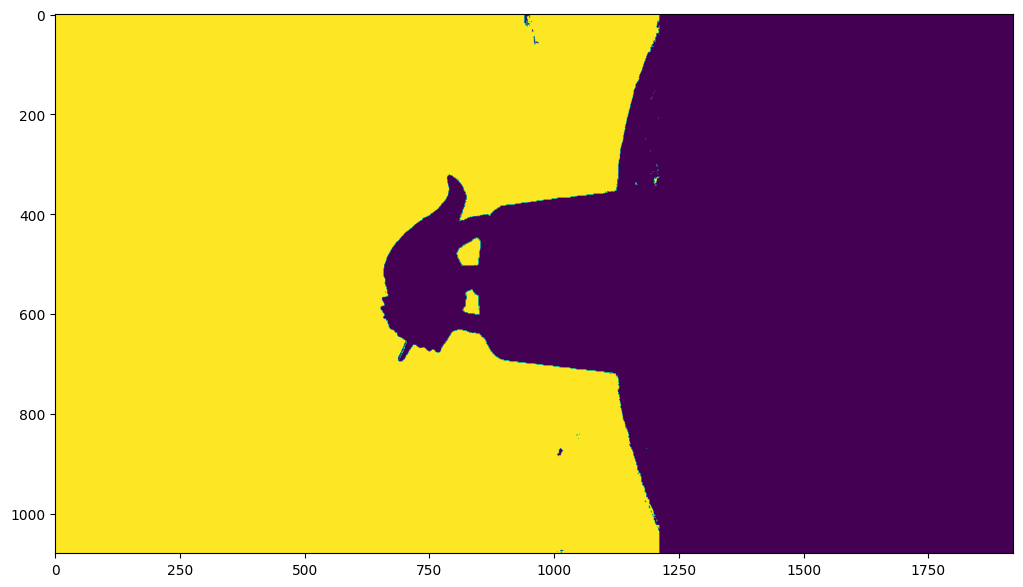

In [536]:
rect_mask = np.full(image.shape[:2], 255, np.uint8)
rect_mask[:,1210:image.shape[1]] = 0

mask = cv.bitwise_and(color_mask,rect_mask)

plt.figure(figsize=(15,7))
plt.imshow(mask)

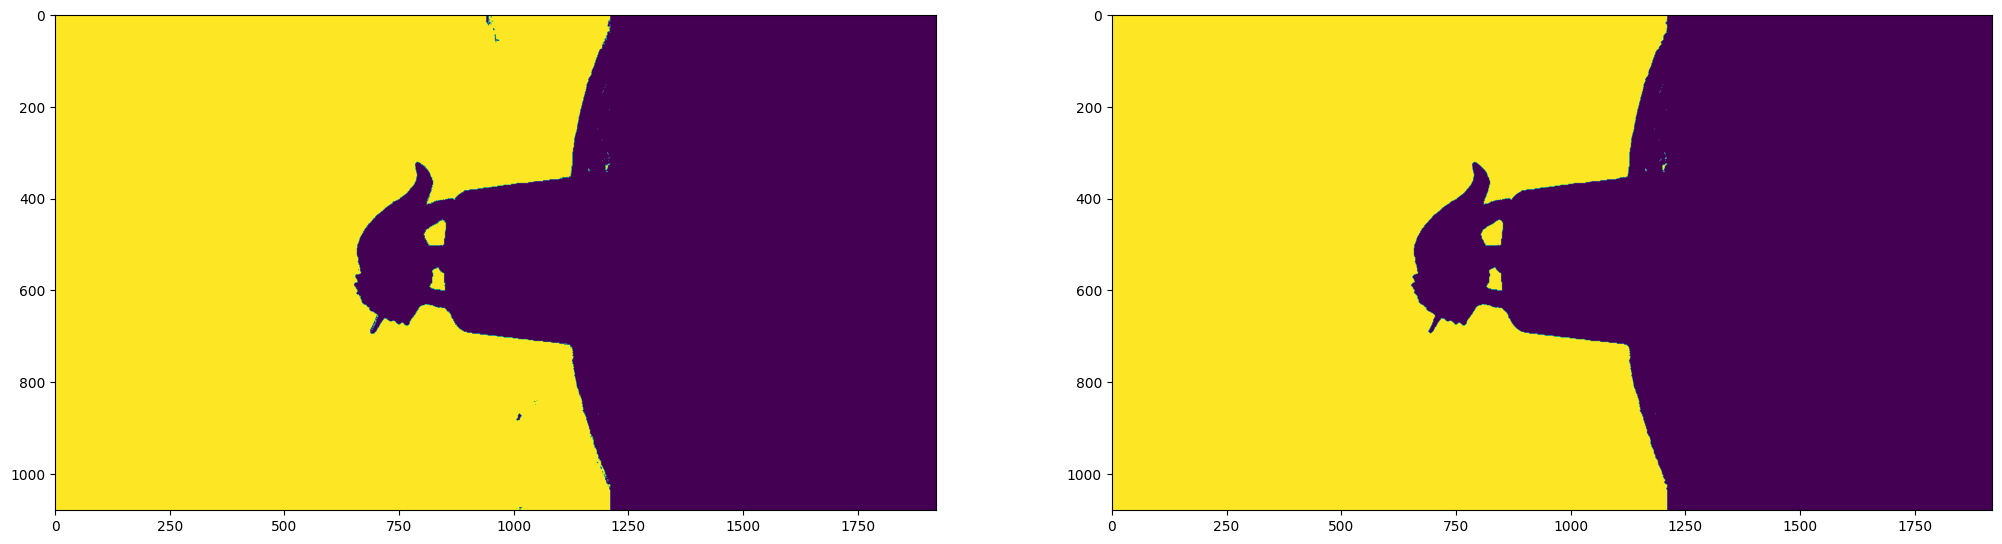

In [537]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

closing1= cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations = 4)

plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.subplot(2,2,2)
plt.imshow(closing1)


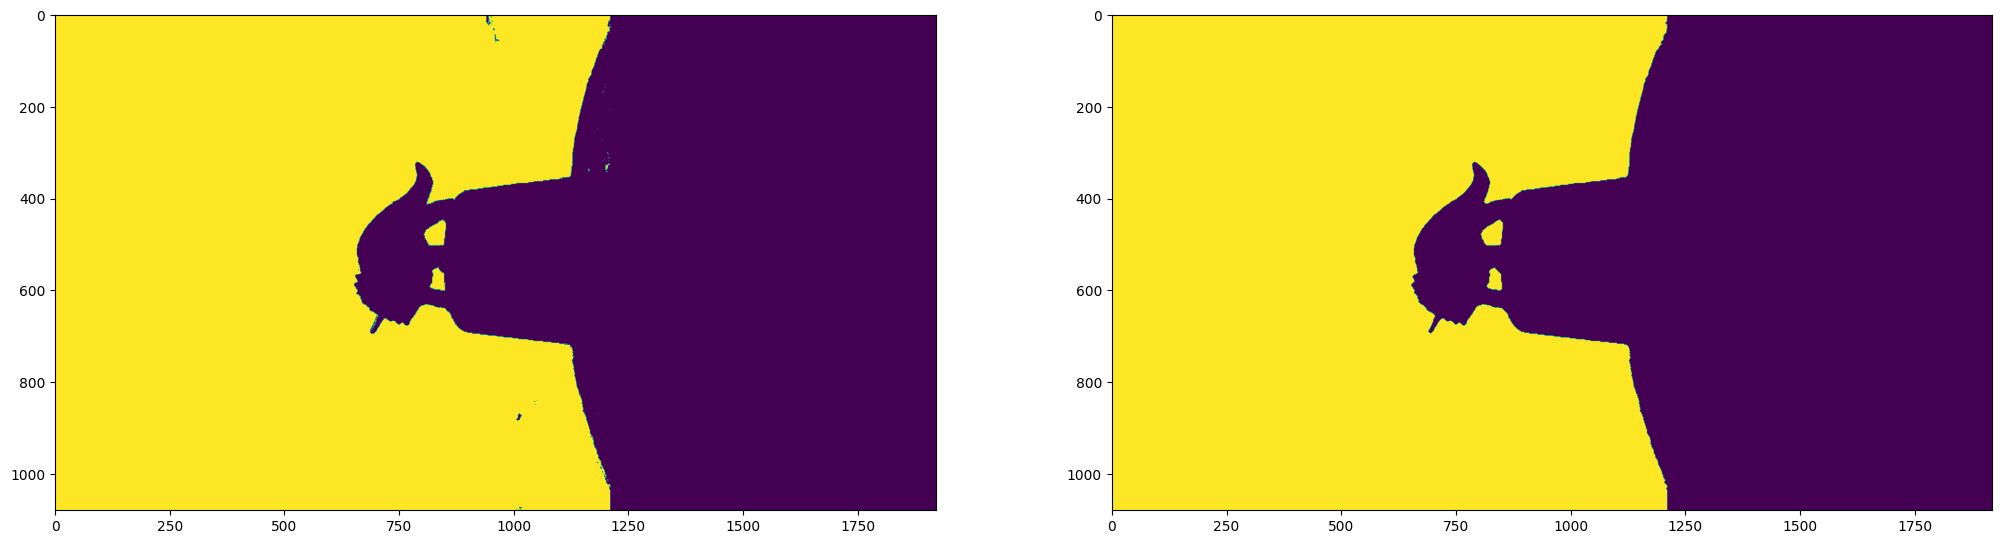

In [538]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
#kernel = np.ones((5,5), np.uint8)

opening = cv.morphologyEx(closing1, cv.MORPH_OPEN, kernel, iterations=3)


plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.subplot(2,2,2)
plt.imshow(opening)

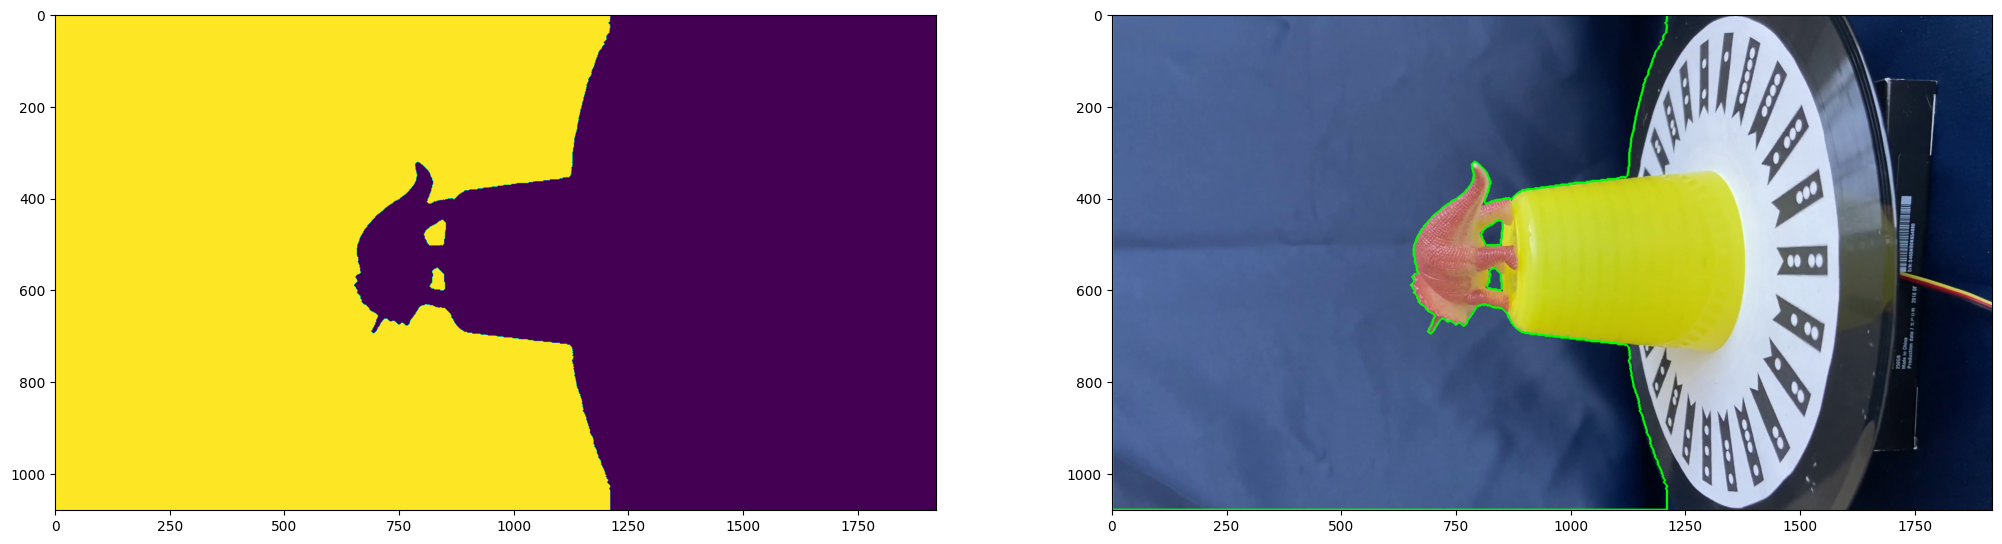

In [539]:
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

#closing2 = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations = 3)

contours, hierarchy = cv.findContours(opening, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(rgb_img, contours, -1, (0,255,0), 3)

plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(opening)
plt.subplot(2,2,2)
plt.imshow(rgb_img)
